In [1]:
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=200, noise=1)
y[0] = 10_000

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
import numpy as np


for model in [LinearRegression(), Ridge()]:
    preds = model.fit(X, y).predict(X)
    err = np.abs(preds - y).mean()
    cv_err = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    print(model, err)
    print(cv_err.mean())

LinearRegression() 307.5227781911275
-633.4951345138479
Ridge() 304.84814159001377
-614.389168728512


<br><br><br><br><br><br><br>

In [4]:
import numpy as np

n_alphas = 20
alphas = np.logspace(-2, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

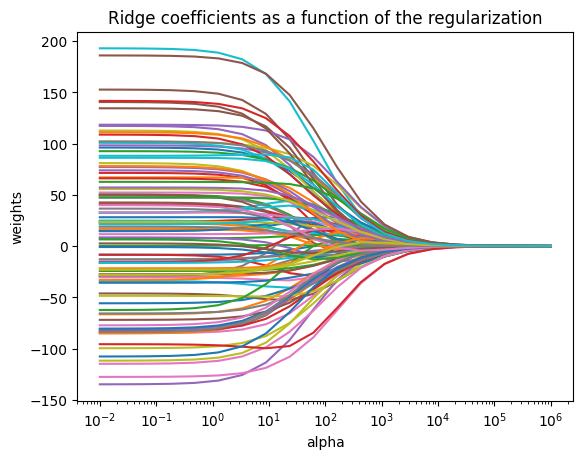

In [5]:
import matplotlib.pylab as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [6]:
import pandas as pd

df = pd.read_csv('data/car_prices.csv').dropna().head(10000)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
cols = [c for c in df.columns if c not in ['sellingprice', 'mmr', 'salesdate', 'vin', 'seller']]

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from skrub import TableVectorizer

X, y = df[cols], df['sellingprice']

In [15]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    TableVectorizer(low_cardinality=OneHotEncoder(drop='if_binary', dtype='float32', handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=50)), 
    model
)

cv = GridSearchCV(pipe, param_grid={"ridge__alpha": np.logspace(-5, 3, 20)}, scoring='neg_mean_squared_error', return_train_score=True)
cv.fit(X, y)

/Users/vincent/Development/calmcode.io/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vincent/Development/calmcode.io/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vincent/Development/calmcode.io/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vincent/Development/calmcode.io/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zer

GridSearchCV(estimator=Pipeline(steps=[('tablevectorizer',
                                        TableVectorizer(low_cardinality=OneHotEncoder(drop='if_binary',
                                                                                      dtype='float32',
                                                                                      handle_unknown='infrequent_if_exist',
                                                                                      min_frequency=50,
                                                                                      sparse_output=False))),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-05, 2.63665090e-05, 6.95192796e-05, 1.83298071e-04,
       4.83293024e-04, 1.27427499e-03, 3.35981829e-03, 8.85866790e-03,
       2.33572147e-02, 6.15848211e-02, 1.62377674e-01, 4.28133240e-01,
       1.12883789e+00, 2.97635144e+00, 7.84759970e+00, 2.06913808e+01,
       5.45559478e+01, 1.43844989e+02, 3.79269019e+02, 1.00000000e+03])},
             return_train_score=True, scoring='neg_mean_squared_error')

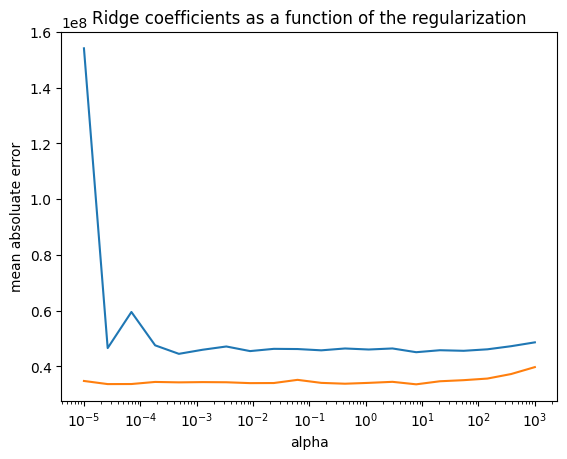

In [17]:
import matplotlib.pylab as plt

plt.plot(cv.cv_results_['param_ridge__alpha'], -cv.cv_results_['mean_test_score'])
plt.plot(cv.cv_results_['param_ridge__alpha'], -cv.cv_results_['mean_train_score'])dt
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("mean absoluate error")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()